In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('C:/Clustering - Global development/World_development_mesurement.xlsx')

In [3]:
data.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [4]:
# missnig columns to see
data.iloc[:, 9:15]

,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female
0,$60,NaN,0.034,0.0,0.100,71.0
1,$22,NaN,0.128,0.0,1.032,47.0
2,$15,NaN,0.090,0.0,NaN,57.0
3,$152,NaN,0.054,0.0,0.155,52.0
4,$12,NaN,0.096,0.0,NaN,52.0
...,...,...,...,...,...,...
2699,NaN,NaN,NaN,NaN,NaN,NaN
2700,"$8,895",175.0,0.006,0.8,0.033,81.0
2701,"$1,308",310.0,0.010,0.5,0.112,80.0
2702,$593,792.0,0.013,0.5,0.164,78.0


In [5]:
data.shape

(2704, 25)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

Columns contain currency symobls($, comma), convert to numeric

column Business Tax Rate is having %

In [7]:
# Columns contain currency symobls($, comma), convert them to numeric
currency_cols = ['GDP', 'Health Exp/Capita','Tourism Inbound', 'Tourism Outbound']

for col in currency_cols:
    data[col] = (data[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float))

In [8]:
# column Business Tax Rate is having %
data['Business Tax Rate']=data['Business Tax Rate'].astype(str).str.replace('%', '', regex=False).astype(float)

In [9]:
# think that the countary name is not useful for our clustring so droping the column, keeing it for interpretation
countries = data['Country']
data.drop(columns=['Country'], inplace=True)

In [10]:
data.describe()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
count,2585.000000,1423.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2.494000e+03,2395.000000,2395.000000,1416.000000,...,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000,2.336000e+03,2.233000e+03
mean,0.022715,48.966901,1.423071e+05,39.999418,94.875676,7.723684e+04,2.638540e+11,0.064170,801.397077,302.068503,...,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953,4.939320e+09,4.729435e+09
std,0.011338,40.954116,6.159288e+05,57.318588,54.791906,2.599239e+05,1.129910e+12,0.026325,1473.448036,273.299686,...,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897,1.385098e+10,1.326774e+10
min,0.007000,8.200000,7.000000e+00,1.000000,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,...,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000,7.000000e+05,2.000000e+05
25%,0.013000,32.400000,1.360000e+03,13.000000,48.000000,3.737000e+03,3.539042e+09,0.046000,50.000000,156.000000,...,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000,1.250000e+08,1.100000e+08
50%,0.020000,41.000000,8.529000e+03,26.000000,94.000000,1.433800e+04,1.507975e+10,0.061000,193.000000,239.000000,...,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000,6.885000e+08,4.560000e+08
75%,0.031000,51.550000,5.910800e+04,45.000000,142.000000,4.185200e+04,1.102047e+11,0.079000,665.000000,344.750000,...,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000,3.601500e+09,2.842000e+09
max,0.053000,339.100000,8.286892e+06,694.000000,189.000000,2.727728e+06,1.624460e+13,0.225000,9908.000000,2600.000000,...,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000,2.000920e+11,1.265730e+11


In [11]:
# finding null values
data.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [12]:
# columns having more missing values so to finding percentage of missing values
data.isnull().mean() *100

Birth Rate                 4.400888
Business Tax Rate         47.374260
CO2 Emissions             21.412722
Days to Start Business    36.464497
Ease of Business          93.158284
Energy Usage              33.986686
GDP                        7.766272
Health Exp % GDP          11.427515
Health Exp/Capita         11.427515
Hours to do Tax           47.633136
Infant Mortality Rate      9.615385
Internet Usage             6.397929
Lending Interest          30.473373
Life Expectancy Female     5.029586
Life Expectancy Male       5.029586
Mobile Phone Usage         6.176036
Number of Records          0.000000
Population 0-14            8.136095
Population 15-64           8.136095
Population 65+             8.136095
Population Total           0.000000
Population Urban           0.961538
Tourism Inbound           13.609467
Tourism Outbound          17.418639
dtype: float64

Here some features missing lots of data about more than 50% and near to it, so best to drop those columns.

Those are 'Business Tax Rate' - 47%, 'Ease of Business' - 93%, 'Hours to do Tax ' - 47%

In [13]:
# removing the coloumns based on the ratio of the missing values, with 45% missing ratio 
missing_value_ratio = data.isnull().mean()
data = data.loc[:, missing_value_ratio < 0.45]

In [14]:
# filling null values with meadin, because it's robust to outliers
data.fillna(data.median(numeric_only=True), inplace=True)

In [15]:
# checking unique values of the columns
data.nunique()

Birth Rate                  47
CO2 Emissions             1743
Days to Start Business     126
Energy Usage              1721
GDP                       2495
Health Exp % GDP           145
Health Exp/Capita         1069
Infant Mortality Rate      129
Internet Usage              11
Lending Interest           351
Life Expectancy Female      49
Life Expectancy Male        47
Mobile Phone Usage          26
Number of Records            1
Population 0-14            377
Population 15-64           299
Population 65+             208
Population Total          2699
Population Urban           822
Tourism Inbound           1651
Tourism Outbound          1457
dtype: int64

In [16]:
# removing the 'Number of Records' column because it's having constant value across the all the rows, such no-variance feature will not usefull
data.drop(columns=['Number of Records'], inplace=True)

In [17]:
# checking the dupicateed rows
data.duplicated().sum()

0

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x1000 with 0 Axes>

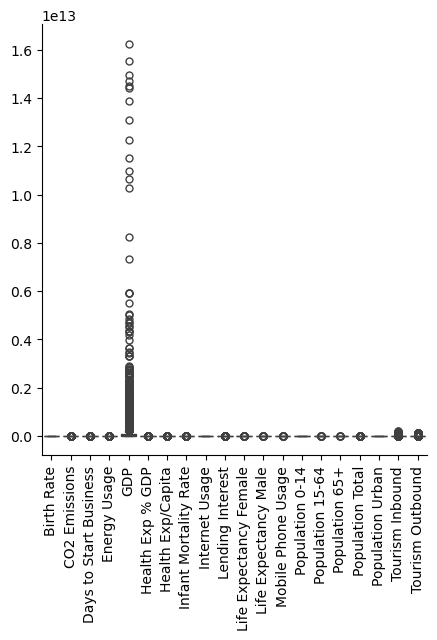

In [19]:
# finding outliers
plt.figure(figsize=(12, 10))
sns.catplot(data, kind='box')
plt.xticks(rotation=90)
plt.show()